<a href="https://colab.research.google.com/github/10points/gauge-reader/blob/main/Gauge_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import zipfile
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, Dropout
from tensorflow.keras.callbacks import LearningRateScheduler
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Extract train data
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/gauge_work/train.zip")
zip_ref.extractall()
zip_ref.close()

In [4]:
# Extract test data
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/gauge_work/test.zip")
zip_ref.extractall()
zip_ref.close()

In [5]:
# Check number of files in train set
for dirpath, dirnames, filenames, in os.walk("/content/content/train"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

there are 20 directories and 0 images in /content/content/train
there are 0 directories and 12 images in /content/content/train/BP_boiler_1
there are 0 directories and 6 images in /content/content/train/CP_boiler_2
there are 0 directories and 8 images in /content/content/train/BF_meter
there are 0 directories and 12 images in /content/content/train/BP_compressor_3
there are 0 directories and 8 images in /content/content/train/BP_compressor_1
there are 0 directories and 9 images in /content/content/train/BP_boiler_5
there are 0 directories and 4 images in /content/content/train/CP_compressor_2
there are 0 directories and 11 images in /content/content/train/BP_control
there are 0 directories and 4 images in /content/content/train/CP_boiler_1
there are 0 directories and 20 images in /content/content/train/BP_compressor_2
there are 0 directories and 6 images in /content/content/train/BP_boiler_4
there are 0 directories and 8 images in /content/content/train/BT_meter
there are 0 directories

In [6]:
# Check number of files in test set
for dirpath, dirnames, filenames, in os.walk("/content/content/test"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

there are 20 directories and 0 images in /content/content/test
there are 0 directories and 3 images in /content/content/test/BP_boiler_1
there are 0 directories and 2 images in /content/content/test/CP_boiler_2
there are 0 directories and 2 images in /content/content/test/BF_meter
there are 0 directories and 4 images in /content/content/test/BP_compressor_3
there are 0 directories and 3 images in /content/content/test/BP_compressor_1
there are 0 directories and 3 images in /content/content/test/BP_boiler_5
there are 0 directories and 2 images in /content/content/test/CP_compressor_2
there are 0 directories and 3 images in /content/content/test/BP_control
there are 0 directories and 2 images in /content/content/test/CP_boiler_1
there are 0 directories and 5 images in /content/content/test/BP_compressor_2
there are 0 directories and 2 images in /content/content/test/BP_boiler_4
there are 0 directories and 3 images in /content/content/test/BT_meter
there are 0 directories and 3 images in 

In [7]:
# Get class name
data_dir = pathlib.Path("/content/content/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['BE_meter' 'BF_meter' 'BP_boiler_1' 'BP_boiler_2' 'BP_boiler_3'
 'BP_boiler_4' 'BP_boiler_5' 'BP_compressor_1' 'BP_compressor_2'
 'BP_compressor_3' 'BP_compressor_4' 'BP_control' 'BT_meter' 'BW_meter_1'
 'BW_meter_2' 'CP_boiler_1' 'CP_boiler_2' 'CP_boiler_3' 'CP_compressor_1'
 'CP_compressor_2']


In [8]:
# Show random image function
def show_random_image(target_dir, target_class):
  target_folder = f"{target_dir}/{target_class}"

  random_img = random.sample(os.listdir(target_folder), 1)
  print(random_img)

  # plotting
  img = mpimg.imread(target_folder + "/" + random_img[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

['IMG_4312.jpg']
Image shape: (4032, 3024, 3)
['IMG_4150.jpg']
Image shape: (3024, 4032, 3)
['IMG_4158.jpg']
Image shape: (4032, 3024, 3)
['IMG_4175.jpg']
Image shape: (4032, 3024, 3)
['IMG_4190.jpg']
Image shape: (4032, 3024, 3)
['IMG_4203.jpg']
Image shape: (4032, 3024, 3)
['IMG_4215.jpg']
Image shape: (4032, 3024, 3)
['IMG_4251.jpg']
Image shape: (4032, 3024, 3)
['IMG_4261.jpg']
Image shape: (4032, 3024, 3)
['IMG_4296.jpg']
Image shape: (4032, 3024, 3)
['IMG_4302.jpg']
Image shape: (4032, 3024, 3)
['IMG_4246.jpg']
Image shape: (4032, 3024, 3)
['IMG_4225.jpg']
Image shape: (4032, 3024, 3)
['IMG_4115.jpg']
Image shape: (3024, 4032, 3)
['IMG_4138.jpg']
Image shape: (4032, 3024, 3)
['PXL_20220601_030411508.jpg']
Image shape: (4032, 3024, 3)
['PXL_20220601_030400222.jpg']
Image shape: (3024, 4032, 3)
['PXL_20220601_030710170.jpg']
Image shape: (4032, 3024, 3)
['PXL_20220601_031017671.jpg']
Image shape: (3024, 4032, 3)
['PXL_20220601_031019634.MP.jpg']
Image shape: (4032, 3024, 3)


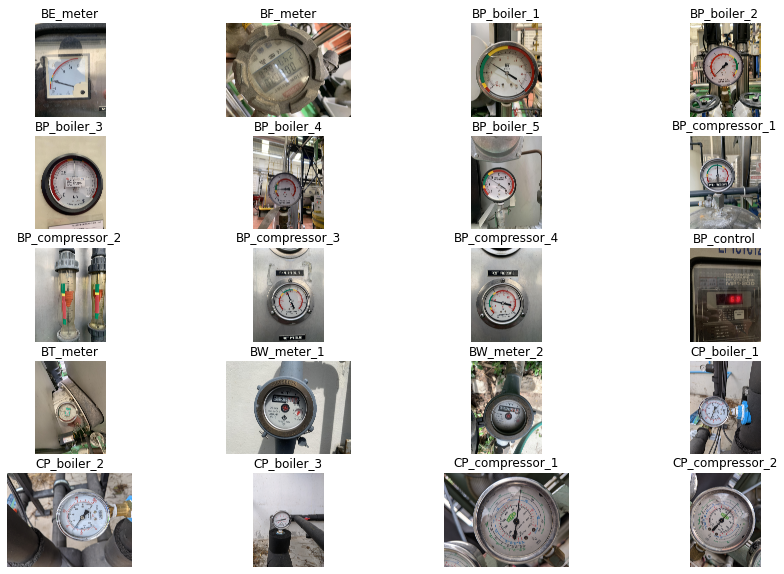

In [9]:
figsize=(15,10)
plt.figure(figsize=figsize)
for index, name in enumerate(class_names):
  # print(index, name)
  plt.subplot(5,4,index+1)
  show_random_image(target_dir="/content/content/train",
                    target_class=name)

## Preprocessing

In [10]:
# Create data generator and re scale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_dir = "/content/content/train"
test_dir = "/content/content/test"

# Load image data from directories into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode="categorical",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="categorical",
                                             batch_size=32)

Found 166 images belonging to 20 classes.
Found 54 images belonging to 20 classes.


In [11]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [12]:
# numbers of batches
len(train_data)

6

In [13]:
images[:2], images[0].shape

(array([[[[0.6117647 , 0.59607846, 0.54901963],
          [0.627451  , 0.59607846, 0.5529412 ],
          [0.6313726 , 0.6       , 0.5568628 ],
          ...,
          [0.5568628 , 0.52156866, 0.46274513],
          [0.57254905, 0.5372549 , 0.4784314 ],
          [0.5803922 , 0.54509807, 0.48627454]],
 
         [[0.6039216 , 0.5882353 , 0.5411765 ],
          [0.62352943, 0.5921569 , 0.54901963],
          [0.627451  , 0.59607846, 0.5529412 ],
          ...,
          [0.5647059 , 0.5294118 , 0.47058827],
          [0.5647059 , 0.5294118 , 0.47058827],
          [0.5764706 , 0.5411765 , 0.48235297]],
 
         [[0.61960787, 0.6039216 , 0.5568628 ],
          [0.61960787, 0.5882353 , 0.54509807],
          [0.61960787, 0.5882353 , 0.54509807],
          ...,
          [0.57254905, 0.5372549 , 0.4784314 ],
          [0.5764706 , 0.5411765 , 0.48235297],
          [0.5647059 , 0.5294118 , 0.47058827]],
 
         ...,
 
         [[0.32156864, 0.30980393, 0.24313727],
          [0.34117

In [14]:
labels

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.

In [15]:
len(test_data)

2

##Modeling

1.Baseline

In [16]:
# Create the baseline model
model_1 = Sequential()
model_1.add(Conv2D(10, (3,3), input_shape=(224,224,3)))
model_1.add(Activation("relu"))
model_1.add(MaxPool2D(pool_size=(2,2)))
model_1.add(Flatten())
model_1.add(Dense(len(class_names)))
model_1.add(Activation("softmax"))

# Compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

In [17]:
# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=20,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/20
6/6 [==============================] - 43s 6s/step - loss: 22.0608 - accuracy: 0.0964 - val_loss: 29.6483 - val_accuracy: 0.0926
Epoch 2/20
6/6 [==============================] - 32s 5s/step - loss: 27.1523 - accuracy: 0.1687 - val_loss: 22.4898 - val_accuracy: 0.1111
Epoch 3/20
6/6 [==============================] - 33s 6s/step - loss: 12.2169 - accuracy: 0.2651 - val_loss: 6.1343 - val_accuracy: 0.3889
Epoch 4/20
6/6 [==============================] - 32s 5s/step - loss: 4.9052 - accuracy: 0.4157 - val_loss: 3.5252 - val_accuracy: 0.5185
Epoch 5/20
6/6 [==============================] - 32s 6s/step - loss: 1.5240 - accuracy: 0.6145 - val_loss: 1.6514 - val_accuracy: 0.5000
Epoch 6/20
6/6 [==============================] - 33s 6s/step - loss: 0.3513 - accuracy: 0.9578 - val_loss: 0.8499 - val_accuracy: 0.8704
Epoch 7/20
6/6 [==============================] - 32s 5s/step - loss: 0.1581 - accuracy: 0.9940 - val_loss: 0.6791 - val_accuracy: 0.8889
Epoch 8/20
6/6 [=============

In [18]:
# Plot the validation and training curve separately
def plot_loss_curve(history):
  """
  Returns separate loss curve for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) 

  # Plot loss 
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

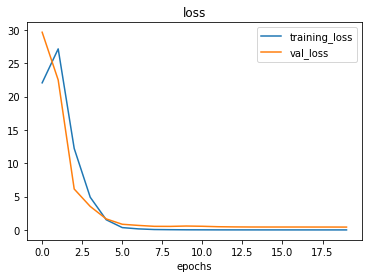

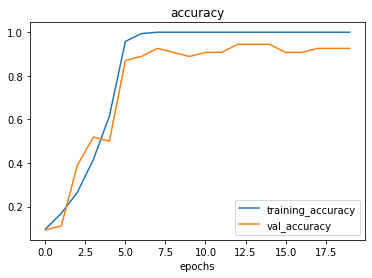

In [19]:
plot_loss_curve(history_1)

In [22]:
def summary_model(model_no):
  # Predict classes
  test_steps_per_epoch = np.math.ceil(test_data.samples / test_data.batch_size)

  predictions = model_no.predict_generator(test_data, steps=test_steps_per_epoch)

  # Get most likely class
  predicted_classes = np.argmax(predictions, axis=1)
  # print(predicted_classes)

  # Get ground-truth classes and class-labels
  true_classes = test_data.classes
  class_labels = list(test_data.class_indices.keys())
  

  # Concusion matrix
  print("confusion matrix")
  print(confusion_matrix(true_classes, predicted_classes))

  # Use scikit-learn to get statistics
  report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
  print(report) 

In [24]:
summary_model(model_1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """


confusion matrix
[[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 2 0 0 0 0 0 0 1 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0]]
                 precision    recall  f1-score   support

       BE_meter       0.00      0.00      0.00         1
       

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
